In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
# Load instruments & trades
instruments = pd.read_csv("../Data/project2_instruments.csv")
trades = pd.read_csv("../Data/project2_trading.csv")

print("Instruments sample:")
print(instruments.head())

print("\nTrades sample:")
print(trades.head())


Instruments sample:
  instrument_id symbol         instrument_name   asset_class exchange  \
0    INST_00001   EQSU          Superior Group  Fixed Income     NYSE   
1    INST_00002   WYUT      Global Enterprises     Commodity      LSE   
2    INST_00003   ZCLW            Dynamic Corp   Derivatives      TSE   
3    INST_00004   QYNK     Strategic Solutions        Crypto      LSE   
4    INST_00005   YTEP  Superior Manufacturing     Commodity      TSE   

       sector  market_cap_usd  avg_daily_volume      beta  volatility_30d  \
0   Financial    1.151404e+11      2.651141e+07 -0.738669        1.032915   
1  Healthcare    1.621521e+12      3.810619e+06 -1.517421        0.203198   
2      Energy    1.437219e+12      1.458938e+07  2.900766        1.467826   
3      Energy    1.262599e+12      1.804662e+06  0.867632        2.332595   
4   Financial    4.360767e+11      4.480747e+07 -0.910945        2.124709   

   sharpe_ratio  correlation_to_index  dividend_yield    pe_ratio  \
0      0.

In [10]:
# Calculate daily returns by instrument
returns = trades.pivot_table(
    index="timestamp", 
    columns="instrument_id", 
    values="pnl_usd"
).pct_change().dropna()

print("Returns matrix shape:", returns.shape)
returns.head()


C:\Users\prasa\AppData\Local\Temp\ipykernel_18404\2595069092.py:6: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ).pct_change().dropna()


Returns matrix shape: (18991, 1500)


instrument_id,INST_00001,INST_00002,INST_00003,INST_00004,INST_00005,INST_00006,INST_00007,INST_00008,INST_00009,INST_00010,...,INST_01491,INST_01492,INST_01493,INST_01494,INST_01495,INST_01496,INST_01497,INST_01498,INST_01499,INST_01500
timestamp,,,,,,,,,,,,,,,,,,,,,
2024-03-30 04:13:15.386512884,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-30 04:24:55.249841662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-30 04:36:35.113170440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-30 04:48:14.976499217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-03-30 04:59:54.839827995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
import pandas as pd

def var(returns, confidence=0.95):
    return returns.quantile(1 - confidence)

def es(returns, confidence=0.95):
    var_level = var(returns, confidence)
    return returns[returns < var_level].mean()

# Sum returns once
total_returns = returns.sum(axis=1)

risk_metrics = {}
for level in [0.95, 0.99]:
    risk_metrics[f"VaR_{int(level*100)}"] = var(total_returns, level)
    risk_metrics[f"ES_{int(level*100)}"] = es(total_returns, level)

risk_df = pd.DataFrame([risk_metrics])
print("Risk Metrics:")
print(risk_df)


Risk Metrics:
    VaR_95      ES_95     VaR_99      ES_99
0 -6.80481 -35.005528 -30.445457 -124.93444


In [13]:
# Merge trades with instrument sector
merged = trades.merge(instruments[["instrument_id", "sector"]], on="instrument_id", how="left")

# Group exposure by sector
sector_exposure = merged.groupby("sector")["portfolio_weight"].mean().reset_index()

print("Sector Exposures:")
print(sector_exposure)


Sector Exposures:
       sector  portfolio_weight
0    Consumer         -0.000379
1      Energy         -0.001974
2   Financial         -0.000356
3  Healthcare         -0.000631
4  Industrial         -0.000285
5  Technology          0.000745


In [14]:
stress_scenarios = {
    "Rate_Shock": returns.sum(axis=1) - 0.05,
    "Volatility_Spike": returns.sum(axis=1) * 1.5,
    "Sector_Drawdown": returns.sum(axis=1) - 0.1
}

stress_df = pd.DataFrame(stress_scenarios)
print("Stress Test Results:")
print(stress_df.tail())


Stress Test Results:
                               Rate_Shock  Volatility_Spike  Sector_Drawdown
timestamp                                                                   
2024-08-30 23:13:20.546684892   -0.444522         -0.591784        -0.494522
2024-08-30 23:25:00.410013668    0.137665          0.281497         0.087665
2024-08-30 23:36:40.273342448   -0.061818         -0.017727        -0.111818
2024-08-30 23:48:20.136671224   -4.056747         -6.010120        -4.106747
2024-08-31 00:00:00.000000000   -0.782311         -1.098466        -0.832311


In [15]:
# Simple breach alert example: if daily loss > 99% VaR
daily_portfolio_returns = returns.sum(axis=1)
var99 = var(daily_portfolio_returns, 0.99)

alerts = daily_portfolio_returns[daily_portfolio_returns < var99]
print("Breach Alerts (days exceeding 99% VaR):")
print(alerts)


Breach Alerts (days exceeding 99% VaR):
timestamp
2024-03-30 13:09:49.099636655    -49.726871
2024-03-31 02:57:59.395979867    -48.526934
2024-04-01 05:36:00.672022401    -43.634437
2024-04-01 06:34:19.988666290    -78.895589
2024-04-01 12:24:15.888529618    -30.722036
                                    ...    
2024-08-26 16:22:52.845761528   -176.391017
2024-08-27 16:05:56.171872396    -38.950917
2024-08-28 22:48:54.577819264    -33.132968
2024-08-29 18:03:41.047368248    -30.514867
2024-08-30 03:00:14.760492020    -54.505186
Length: 190, dtype: float64


In [16]:
risk_output = pd.concat([risk_df, stress_df], axis=1)
risk_output.to_csv("daily_risk_metrics.csv", index=False)
sector_exposure.to_csv("sector_exposure.csv", index=False)

print("✅ Risk analytics outputs saved: daily_risk_metrics.csv, sector_exposure.csv")


✅ Risk analytics outputs saved: daily_risk_metrics.csv, sector_exposure.csv


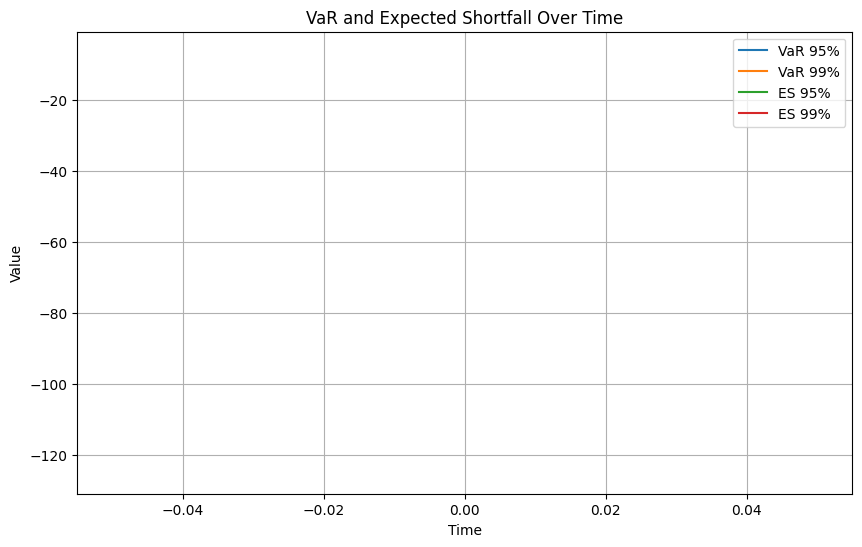

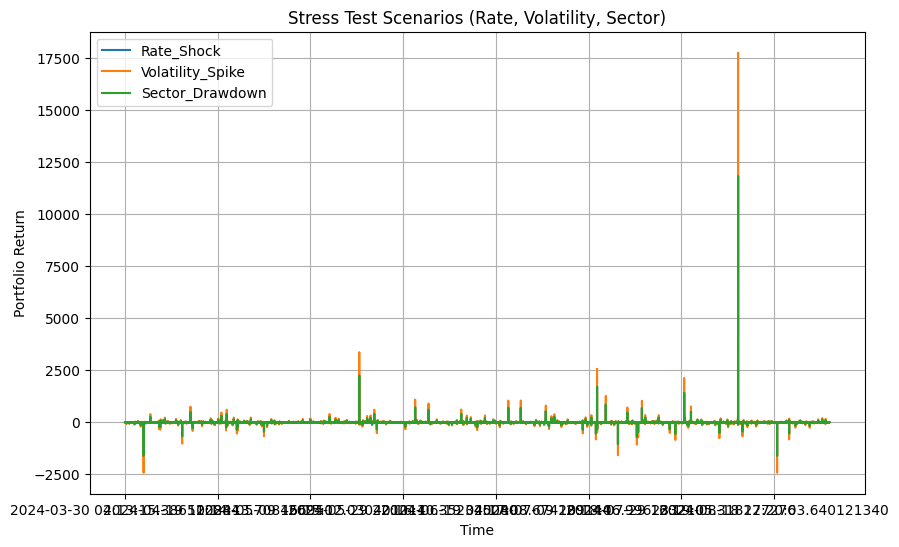

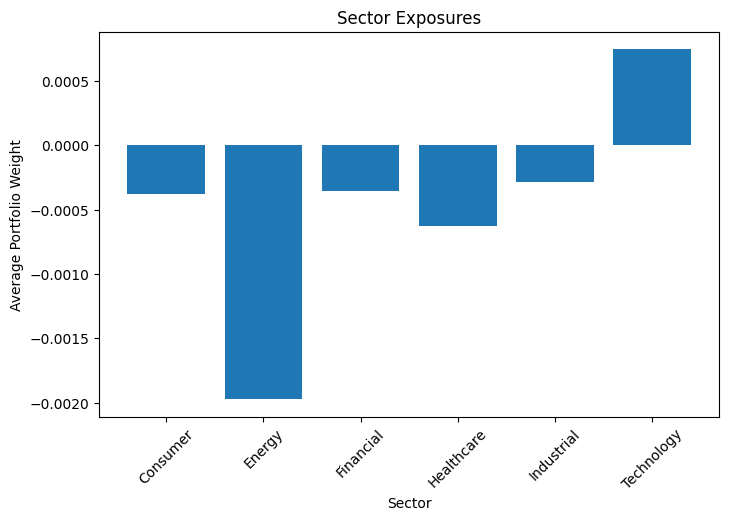

In [18]:


# ---- VaR & ES Trend ----
plt.figure(figsize=(10,6))
plt.plot(risk_df.index, risk_df["VaR_95"], label="VaR 95%")
plt.plot(risk_df.index, risk_df["VaR_99"], label="VaR 99%")
plt.plot(risk_df.index, risk_df["ES_95"], label="ES 95%")
plt.plot(risk_df.index, risk_df["ES_99"], label="ES 99%")
plt.legend()
plt.title("VaR and Expected Shortfall Over Time")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)
plt.show()

# ---- Stress Scenario Chart ----
stress_df.plot(figsize=(10,6))
plt.title("Stress Test Scenarios (Rate, Volatility, Sector)")
plt.xlabel("Time")
plt.ylabel("Portfolio Return")
plt.grid(True)
plt.show()

# ---- Sector Exposure Bar Chart ----
plt.figure(figsize=(8,5))
plt.bar(sector_exposure["sector"], sector_exposure["portfolio_weight"])
plt.title("Sector Exposures")
plt.xlabel("Sector")
plt.ylabel("Average Portfolio Weight")
plt.xticks(rotation=45)
plt.show()

